In [1]:
import sys
sys.path.append("../../")

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from botorch.utils.sampling import draw_sobol_samples

from optimizers.lfbo.lfbo_multitask import LFBO_MultiTask

tkwargs = {"device": "cpu:0", "dtype": torch.double}

In [3]:
def forrester(x, noise_level=.2):
    f = np.sin(3*x) + x**2 - 0.7*x + np.random.normal(0, noise_level, x.shape)
    return f

bounds = torch.tensor([[-1.], [2.]], **tkwargs)

In [4]:
x_dense = torch.linspace(-1, 2, 512, **tkwargs).reshape(-1, 1)
y_dense = forrester(x_dense, noise_level=0)

In [5]:
num_obs = 32
x_obs = draw_sobol_samples(bounds=bounds, n=num_obs, q=1, seed=123).squeeze(-2)
y_obs = forrester(x_obs, noise_level=0.2).squeeze()

## 4 quantiles

In [6]:
gammas=[.25, .5, .75]
lfbo = LFBO_MultiTask(input_dim=1, output_dim=1, gammas=gammas)

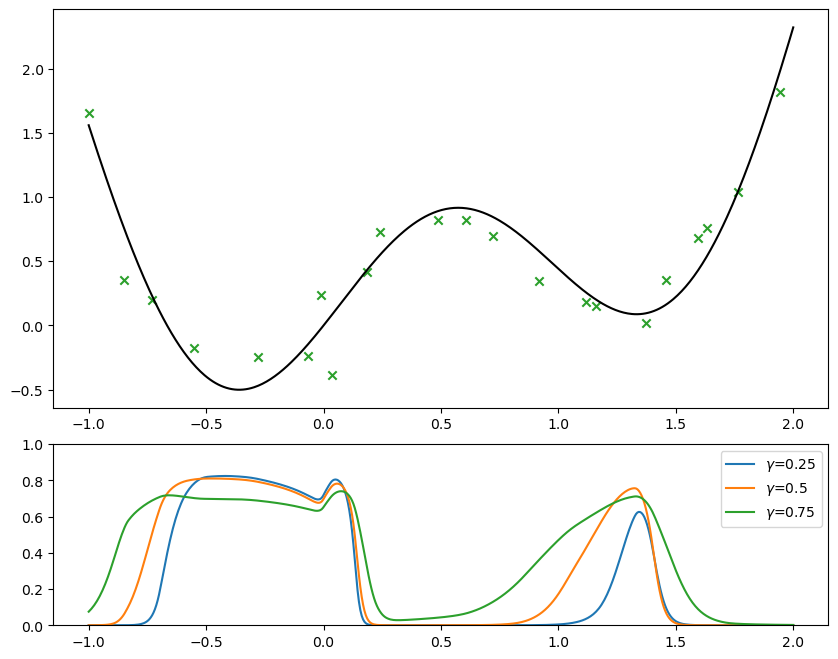

In [7]:
num_iter = 1
obs_start = 22

for i in range(num_iter):
    lfbo.fit(x_obs[:obs_start+i], y_obs[:obs_start+i], S=2000 if i==0 else 100)
    acf_means = []
    for idx, _ in enumerate(gammas):
        acf_mean = lfbo.predict(x_dense, [idx]*len(x_dense))
        acf_means.append(acf_mean)

    fig = plt.figure(figsize=(10, 8))

    ax_func = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
    ax_func.plot(x_dense, y_dense, color='k', label="objective function")
    ax_func.scatter(x_obs[:obs_start+i], y_obs[:obs_start+i], marker='x', color='tab:green', label="observations")

    ax_lfbo = plt.subplot2grid((3, 1), (2, 0), rowspan=1, sharex=ax_func)
    for acf_mean, gamma in zip(acf_means, gammas):
        ax_lfbo.plot(
            x_dense,
            acf_mean,
            # c='k',
            label=rf"$\gamma$={gamma}",
        )
    ax_lfbo.set_ylim(0., 1.)
    ax_lfbo.legend()

    plt.show()

## 10 quantiles

In [8]:
gammas=[.1, .2, .3, .4, .5, .6, .7, .8, .9]
lfbo = LFBO_MultiTask(input_dim=1, output_dim=1, gammas=gammas)

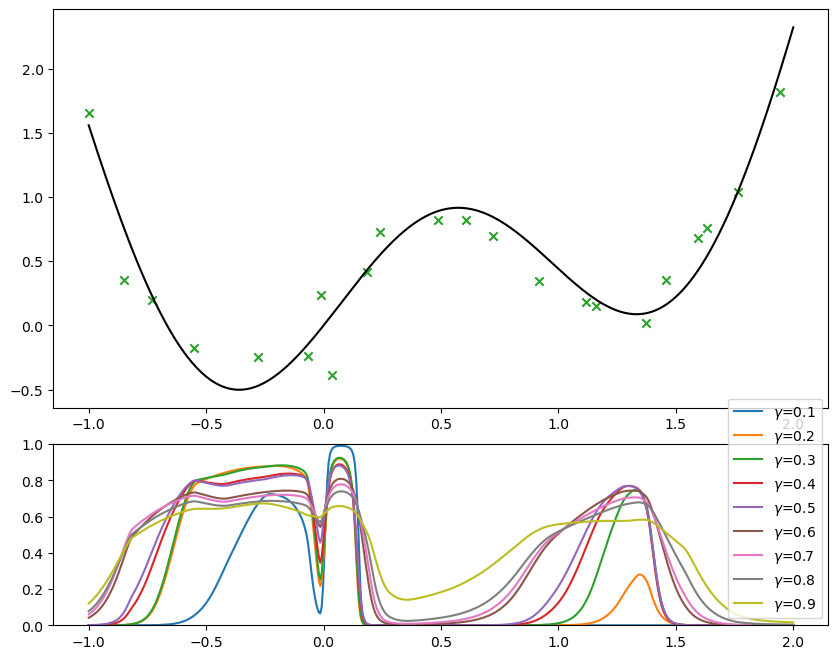

In [9]:
num_iter = 1
obs_start = 22

for i in range(num_iter):
    lfbo.fit(x_obs[:obs_start+i], y_obs[:obs_start+i], S=2000 if i==0 else 100)
    acf_means = []
    for idx, _ in enumerate(gammas):
        acf_mean = lfbo.predict(x_dense, [idx]*len(x_dense))
        acf_means.append(acf_mean)

    fig = plt.figure(figsize=(10, 8))

    ax_func = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
    ax_func.plot(x_dense, y_dense, color='k', label="objective function")
    ax_func.scatter(x_obs[:obs_start+i], y_obs[:obs_start+i], marker='x', color='tab:green', label="observations")

    ax_lfbo = plt.subplot2grid((3, 1), (2, 0), rowspan=1, sharex=ax_func)
    for acf_mean, gamma in zip(acf_means, gammas):
        ax_lfbo.plot(
            x_dense,
            acf_mean,
            # c='k',
            label=rf"$\gamma$={gamma}",
        )
    ax_lfbo.set_ylim(0., 1.)
    ax_lfbo.legend()

    plt.show()